In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import host_subplot
import mpl_toolkits.axisartist as AA
import pandas as pd
import seaborn as sns
sns.set(style="white")
sns.palette="tab10"
sns.set_style("ticks")

In [2]:
gdp = pd.read_csv("Data/GDP.csv")
gdp = gdp.values
gdp = {"Country": gdp[:,0], "GDP": gdp[:,1].astype(np.float), "Growth": gdp[:,2].astype(np.float)}

In [3]:
consumption_over_time = pd.read_csv("Data/Consumption_over_time.csv", engine='python')
co2_over_time = pd.read_csv("Data/CO2-emmisions_per_year.csv", engine='python')
headings = ["Million tonnes oil equivalent", "Oil", "Natural Gas", "Coal", 
            "Nuclear energy", "Hydro electric", "Renewables", "Total"]

energy_type_country_2017 = pd.read_csv("Data/2017_consumption_by_type.csv", 
                                       names=headings, engine='python')
nuclear_energy_by_year = pd.read_csv("Data/Nuclear_Energy_By_Year.csv", engine='python')
consuption_by_type_2017 = pd.read_csv("Data/2017_Consumption_By_Country.csv", engine='python')
electricity_2017 = pd.read_csv("Data/Electricity_By_Country_2017.csv", engine='python')
usage_by_type = pd.read_csv("Data/Usage_By_Type.csv")

In [4]:
conv2017 = energy_type_country_2017.values
co2_time = co2_over_time.values
consumption = consumption_over_time.values
nuclear_year = nuclear_energy_by_year.values
cons2017 = consuption_by_type_2017.values
electricity_2017 = electricity_2017.values
usage_by_type = usage_by_type.values


In [5]:
Big_12 = {"Countries": ["USA", "China", "Japan", "India", "Germany", "Canada", "France", "Brazil", "S.Korea",
                        "Russia", "UK", "Mexico"],
         "Energy": [conv2017[2][1:-1], conv2017[65][1:-1], conv2017[69][1:-1], conv2017[67][1:-1], conv2017[22][1:-1],
                    conv2017[3][1:-1], conv2017[21][1:-1], conv2017[8][1:-1], conv2017[75][1:-1], conv2017[41][1:-1], 
                    conv2017[35][1:-1], conv2017[4][1:-1]],
         "Electricity": [electricity_2017[0][1:-1], electricity_2017[26][1:-1], electricity_2017[29][1:-1],
                         electricity_2017[27][1:-1], electricity_2017[6][1:-1], electricity_2017[1][1:-1],
                         electricity_2017[36][1:-1], electricity_2017[4][1:-1], electricity_2017[31][1:-1],
                         electricity_2017[15][1:-1], electricity_2017[12][1:-1], electricity_2017[2][1:-1]],
          "Emitters": [5574.86, 9632.26, 1212.07, 2504.90, 907.94, 696.67, 442.92, 1049.11, 618.66, 
                       1543.54, 581.30, 587.88],
          "Usage": [usage_by_type[1][1:], usage_by_type[0][1:], usage_by_type[4][1:], usage_by_type[2][1:], 
                    usage_by_type[6][1:], usage_by_type[7][1:], usage_by_type[11][1:], usage_by_type[5][1:],
                    usage_by_type[8][1:], usage_by_type[3][1:], usage_by_type[10][1:], usage_by_type[9][1:]],
          
         }

Usage_by_Source = {"Total": [2843.29, 10113.74, 5380.91, 1971.03, 1261.86, 1852.62, 3718.19], 
                   "Usage": ["Agriculture", "Electricity/Heat", "Industry", "Other Fuel Combustion", 
                             "Other Sectors", "Residential", "Transport"]}

Emmissions_by_source = {"Total": [5197.83, 13853.37, 7226.26, 3217.89, 2384.99, 2705.48, 5593.22],
                        "Usage": ["Agriculture", "Electricity/Heat", 
                                  "Industry", "Other Fuel Combustion", "Other Sectors", "Residential", 
                                  "Transport"]}

WORLD2017 = conv2017[82]
WORLD = {"2017": WORLD2017[1:-1], "2017": WORLD2017[1:-1], 
       "labels": ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", 
                  "Renewable"]}

elec = {"2017": [883.0, 5915.3, 9723.4, 2635.6, 4059.9, 2151.5, 182.6], 
       "labels": ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", 
                  "Renewable", "Other"]}

print()

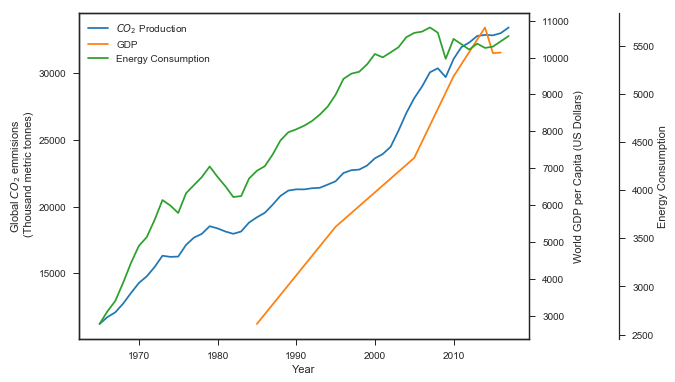

In [6]:
CO2_production = co2_time[107]
Consumption_over_time = consumption[108]


fig, host = plt.subplots(figsize=(10,6))
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.2))
par2.spines["right"].set_visible(True)

p1, = host.plot(np.arange(1965, 2018), CO2_production[1:-3], 
                color='#1f77b4', label="$CO_2$ Production")
host.set_ylabel("Global $CO_2$ emmisions\n (Thousand metric tonnes)")

p2, = par1.plot([1985, 1995, 2005, 2010, 2014, 2015,2016], 
                [2775, 5409, 7278, 9489, 10815, 10120, 10134], 
                label="GDP", color='#ff7f0e')
par1.set_ylabel("World GDP per Capita (US Dollars)")

p3, = par2.plot(np.arange(1965, 2018), Consumption_over_time[1:-3], 
                color='#2ca02c', label="Energy Consumption")
par2.set_ylabel("Energy Consumption")

lns = [p1, p2, p3]

host.set_xlabel("Year")
host.legend(handles=lns, frameon=False)
plt.draw()
plt.show()
plt.close()

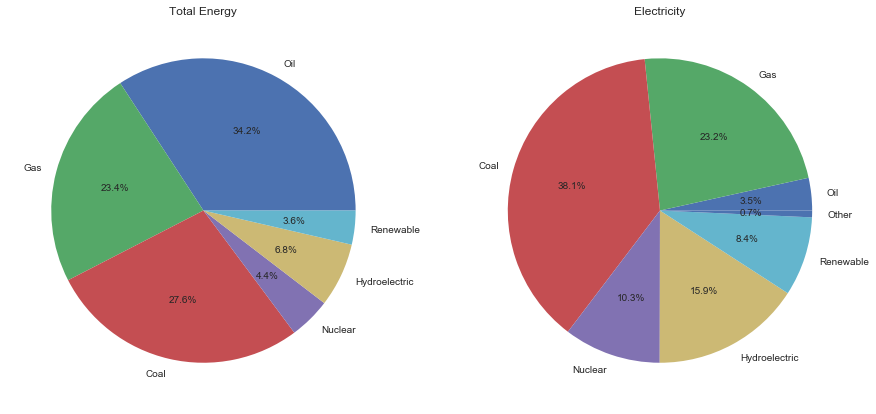

In [7]:
plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 1)
ax1.axis("equal")
ax1.set_title("Total Energy")
ax1.pie(WORLD["2017"], labels=WORLD["labels"], autopct="%1.1f%%")

ax2 = plt.subplot(1, 2, 2)
ax2.axis("equal")
ax2.set_title("Electricity")
ax2.pie(elec["2017"], labels=elec["labels"], autopct="%1.1f%%")
plt.show()
plt.close()


As 70% of the worlds emissions come from 12 countries (China, USA, Japan, India, Germany, Canada, France, Brazil, South Korea, Rissia, United Kingdom and Mexico),  the following analysis will only contain data for those countries.

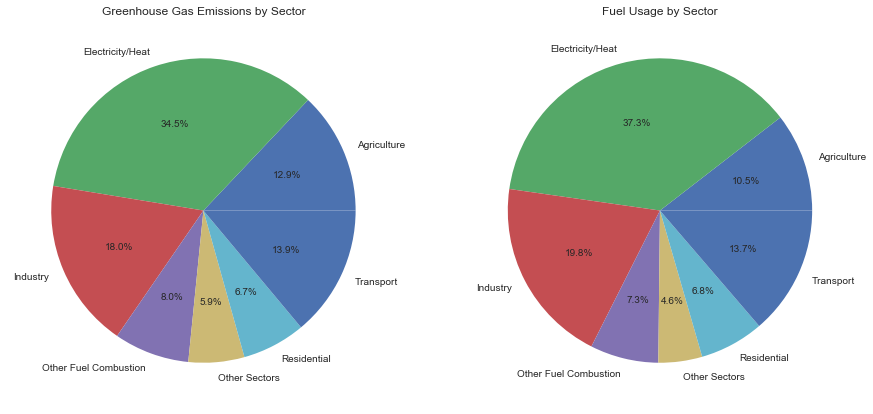

In [8]:
plt.figure(figsize=(15, 7))
ax1 = plt.subplot(1, 2, 1)
ax1.axis("equal")
ax1.set_title("Greenhouse Gas Emissions by Sector")
ax1.pie(Emmissions_by_source["Total"], labels=Emmissions_by_source["Usage"], autopct="%1.1f%%")

ax2 = plt.subplot(1, 2, 2)
ax2.axis("equal")
ax2.set_title("Fuel Usage by Sector")
ax2.pie(Usage_by_Source["Total"], labels=Usage_by_Source["Usage"], autopct="%1.1f%%")

plt.show()
plt.close()

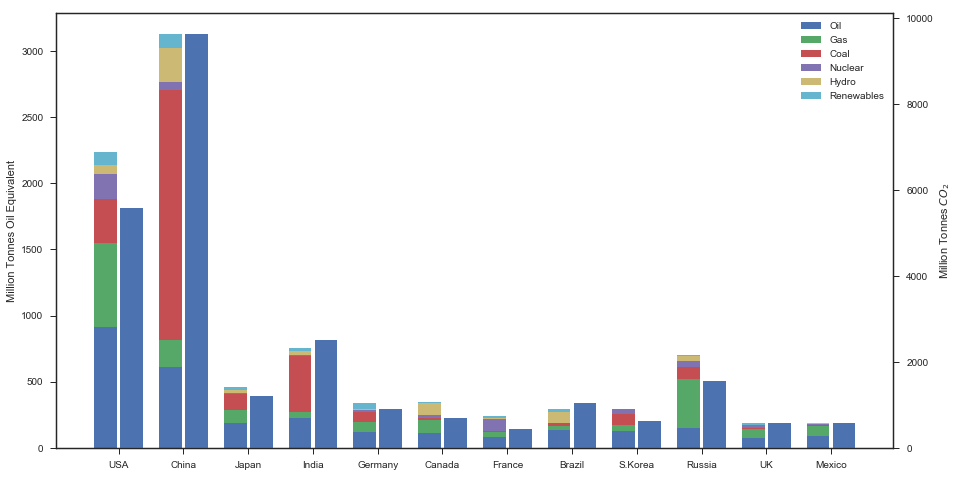

In [13]:
x = Big_12["Energy"]
x = np.asarray(x)
x = x.astype(float)


fig, ax = plt.subplots(figsize=(15, 8))
width = 0.35
N = np.arange(12)


p1 = ax.bar(N - 0.2, x[:,0], width)
p2 = ax.bar(N - 0.2, x[:,1], width, bottom= x[:,0])
p3 = ax.bar(N - 0.2, x[:,2], width, bottom=(x[:,0] + x[:,1]))
p4 = ax.bar(N - 0.2, x[:,3], width, bottom=(x[:,0] + x[:,1] + x[:,2]))
p5 = ax.bar(N - 0.2, x[:,4], width, bottom=(x[:,0] + x[:,1] + x[:,2] + x[:,3]))
p6 = ax.bar(N - 0.2, x[:,5], width, bottom=(x[:,0] + x[:,1] + x[:,2] + x[:,3] + x[:,4]))

ax1 = ax.twinx()
ax1.bar(N + 0.2, Big_12["Emitters"], 0.35)

ax.set_ylabel("Million Tonnes Oil Equivalent")
ax1.set_ylabel("Million Tonnes $CO_2$")
ax.tick_params(axis='x')

plt.xticks(N, Big_12["Countries"], rotation=45, horizontalalignment="right")

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), 
           ('Oil', 'Gas', 'Coal', 'Nuclear', "Hydro", "Renewables"))

plt.show()

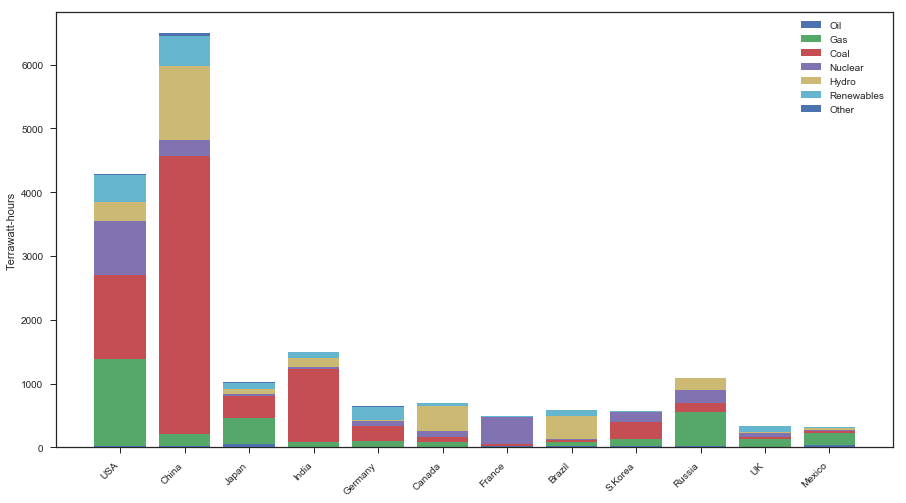

In [10]:
x = Big_12["Electricity"]
x = np.asarray(x)
x = x.astype(float)

plt.figure(figsize=(15, 8))
width = 0.8
N = np.arange(12)


p1 = plt.bar(N, x[:,0], width)
p2 = plt.bar(N, x[:,1], width, bottom= x[:,0])
p3 = plt.bar(N, x[:,2], width, bottom=(x[:,0] + x[:,1]))
p4 = plt.bar(N, x[:,3], width, bottom=(x[:,0] + x[:,1] + x[:,2]))
p5 = plt.bar(N, x[:,4], width, bottom=(x[:,0] + x[:,1] + x[:,2] + x[:,3]))
p6 = plt.bar(N, x[:,5], width, bottom=(x[:,0] + x[:,1] + x[:,2] + x[:,3] + x[:,4]))
p7 = plt.bar(N, x[:,6], width, bottom=(x[:,0] + x[:,1] + x[:,2] + x[:,3] + x[:,4] + x[:,5]))


plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), 
           ('Oil', 'Gas', 'Coal', 'Nuclear', "Hydro", "Renewables", "Other"))
plt.xticks(N, Big_12["Countries"], rotation=45, horizontalalignment="right")
plt.tick_params(axis='x')
plt.ylabel("Terrawatt-hours")
plt.show()

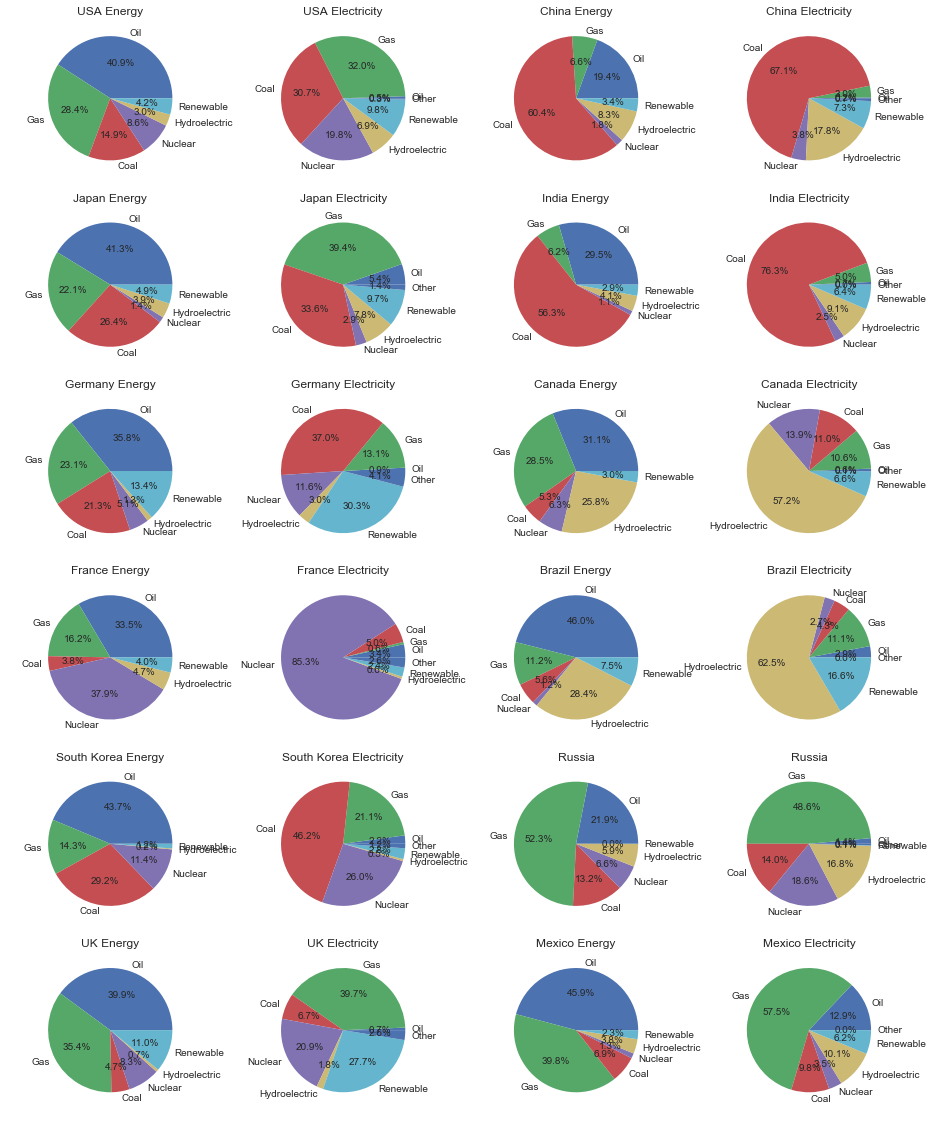

In [23]:
Energy_labels = ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", "Renewable"]
Elec_labels = ["Oil", "Gas", "Coal", "Nuclear", "Hydroelectric", "Renewable", "Other"]

plt.figure(figsize=(16, 20))

ax1 = plt.subplot(6, 4, 1)
ax1.axis("equal")
ax1.set_title("USA Energy")
ax1.pie(Big_12["Energy"][0], labels=Energy_labels, autopct="%1.1f%%")

ax2 = plt.subplot(6, 4, 2)
ax2.axis("equal")
ax2.set_title("USA Electricity")
ax2.pie(Big_12["Electricity"][0], labels=Elec_labels, autopct="%1.1f%%")

ax3 = plt.subplot(6, 4, 3)
ax3.axis("equal")
ax3.set_title("China Energy")
ax3.pie(Big_12["Energy"][1], labels=Energy_labels, autopct="%1.1f%%")

ax4 = plt.subplot(6, 4, 4)
ax4.axis("equal")
ax4.set_title("China Electricity")
ax4.pie(Big_12["Electricity"][1], labels=Elec_labels, autopct="%1.1f%%")

ax5 = plt.subplot(6, 4, 5)
ax5.axis("equal")
ax5.set_title("Japan Energy")
ax5.pie(Big_12["Energy"][2], labels=Energy_labels, autopct="%1.1f%%")

ax6 = plt.subplot(6, 4, 6)
ax6.axis("equal")
ax6.set_title("Japan Electricity")
ax6.pie(Big_12["Electricity"][2], labels=Elec_labels, autopct="%1.1f%%")

ax7 = plt.subplot(6, 4, 7)
ax7.axis("equal")
ax7.set_title("India Energy")
ax7.pie(Big_12["Energy"][3], labels=Energy_labels, autopct="%1.1f%%")

ax8 = plt.subplot(6, 4, 8)
ax8.axis("equal")
ax8.set_title("India Electricity")
ax8.pie(Big_12["Electricity"][3], labels=Elec_labels, autopct="%1.1f%%")

ax9 = plt.subplot(6, 4, 9)
ax9.axis("equal")
ax9.set_title("Germany Energy")
ax9.pie(Big_12["Energy"][4], labels=Energy_labels, autopct="%1.1f%%")

ax10 = plt.subplot(6, 4, 10)
ax10.axis("equal")
ax10.set_title("Germany Electricity")
ax10.pie(Big_12["Electricity"][4], labels=Elec_labels, autopct="%1.1f%%")

ax11 = plt.subplot(6, 4, 11)
ax11.axis("equal")
ax11.set_title("Canada Energy")
ax11.pie(Big_12["Energy"][5], labels=Energy_labels, autopct="%1.1f%%")

ax12 = plt.subplot(6, 4, 12)
ax12.axis("equal")
ax12.set_title("Canada Electricity")
ax12.pie(Big_12["Electricity"][5], labels=Elec_labels, autopct="%1.1f%%")

ax13 = plt.subplot(6, 4, 13)
ax13.axis("equal")
ax13.set_title("France Energy")
ax13.pie(Big_12["Energy"][6], labels=Energy_labels, autopct="%1.1f%%")

ax14 = plt.subplot(6, 4, 14)
ax14.axis("equal")
ax14.set_title("France Electricity")
ax14.pie(Big_12["Electricity"][6], labels=Elec_labels, autopct="%1.1f%%")

ax15 = plt.subplot(6, 4, 15)
ax15.axis("equal")
ax15.set_title("Brazil Energy")
ax15.pie(Big_12["Energy"][7], labels=Energy_labels, autopct="%1.1f%%")

ax16 = plt.subplot(6, 4, 16)
ax16.axis("equal")
ax16.set_title("Brazil Electricity")
ax16.pie(Big_12["Electricity"][7], labels=Elec_labels, autopct="%1.1f%%")

ax17 = plt.subplot(6, 4, 17)
ax17.axis("equal")
ax17.set_title("South Korea Energy")
ax17.pie(Big_12["Energy"][8], labels=Energy_labels, autopct="%1.1f%%")

ax18 = plt.subplot(6, 4, 18)
ax18.axis("equal")
ax18.set_title("South Korea Electricity")
ax18.pie(Big_12["Electricity"][8], labels=Elec_labels, autopct="%1.1f%%")

ax19 = plt.subplot(6, 4, 19)
ax19.axis("equal")
ax19.set_title("Russia")
ax19.pie(Big_12["Energy"][9], labels=Energy_labels, autopct="%1.1f%%")

ax20 = plt.subplot(6, 4, 20)
ax20.axis("equal")
ax20.set_title("Russia")
ax20.pie(Big_12["Electricity"][9], labels=Elec_labels, autopct="%1.1f%%")

ax21 = plt.subplot(6, 4, 21)
ax21.axis("equal")
ax21.set_title("UK Energy")
ax21.pie(Big_12["Energy"][10], labels=Energy_labels, autopct="%1.1f%%")

ax22 = plt.subplot(6, 4, 22)
ax22.axis("equal")
ax22.set_title("UK Electricity")
ax22.pie(Big_12["Electricity"][10], labels=Elec_labels, autopct="%1.1f%%")

ax23 = plt.subplot(6, 4, 23)
ax23.axis("equal")
ax23.set_title("Mexico Energy")
ax23.pie(Big_12["Energy"][11], labels=Energy_labels, autopct="%1.1f%%")

ax24 = plt.subplot(6, 4, 24)
ax24.axis("equal")
ax24.set_title("Mexico Electricity")
ax24.pie(Big_12["Electricity"][11], labels=Elec_labels, autopct="%1.1f%%")

plt.show()

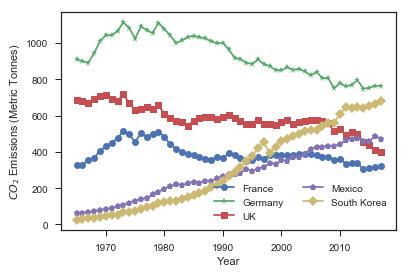

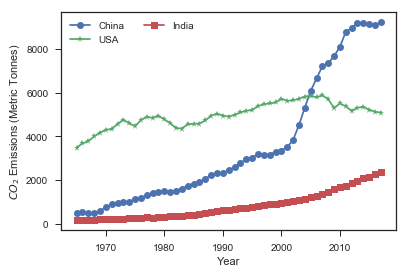

In [27]:
CO2_France = co2_time[28]
CO2_Germany = co2_time[29]
CO2_UK = co2_time[50]
CO2_Mexico = co2_time[3]
CO2_SK = co2_time[99]
CO2_China = co2_time[89]
CO2_USA = co2_time[1]
CO2_India = co2_time[91]
Time = np.arange(1965, 2018)

plt.plot(Time, CO2_France[1:-3], label="France", marker="o")
plt.plot(Time, CO2_Germany[1:-3], label="Germany", marker="*")
plt.plot(Time, CO2_UK[1:-3], label="UK", marker="s")
plt.plot(Time, CO2_Mexico[1:-3], label="Mexico", marker="p")
plt.plot(Time, CO2_SK[1:-3], label="South Korea", marker="D")
plt.ylabel("$CO_2$ Emissions (Metric Tonnes)")
plt.xlabel("Year")
plt.legend(frameon=False, ncol=2)
plt.show()


plt.plot(Time, CO2_China[1:-3], label="China", marker="o")
plt.plot(Time, CO2_USA[1:-3], label="USA", marker="*")
plt.plot(Time, CO2_India[1:-3], label="India", marker="s")
plt.ylabel("$CO_2$ Emissions (Metric Tonnes)")
plt.xlabel("Year")
plt.legend(frameon=False, ncol=2)
plt.show()

In [ ]:
uranium_mining = {"Tonnes": [3005, 1005, 3657, 3478, 14037, 1123,
                             1616, 24575, 2404, 6234], 
       "labels": ["Russia", "Ukraine", "Namibia", "Niger", 
                  "Canada", "China", "USA", "Kazakhstan", 
                  "Uzbekistan", "Australia"]}

fig, ax = plt.subplots(figsize=(10,10))
ax.axis("equal")
ax.set_title("Uranium Mining")
ax.pie(uranium_mining["Tonnes"], labels=uranium_mining["labels"], autopct="%1.1f%%")
plt.savefig("Figures/Figure_3", dpi=600)

plt.show()

In [ ]:
Total_Generation = np.array([847.3, 398.4, 248.3, 203.1, 148.4, 96.7, 85.6, 75.9, 70.3, 306.11, 152.77])
Countries = np.array(["US", "France", "China", "Russia", "South Korea", "Canada", "Ukraine", 
                      "Germany", "United Kingdom", "Other Europe", "Other"])

fig, ax = plt.subplots(figsize=(10,10))
ax.axis("equal")
ax.set_title("Breakdown of Nuclear Energy Producetion by Country")
ax.pie(Total_Generation, labels=Countries, autopct="%1.1f%%", colors=sns.color_palette("Paired"))

plt.show()

In [ ]:
Fossil_Fuel_Percentages = np.array([])
Nuclear_Percentages = np.array([])
Renewables_Percentages = np.array([])
Hydroelectric_Percentages = np.array([])

Fossils = np.array([])
Nuclear = np.array([])
Hydroelectric = np.array([])
Renewables = np.array([])

Coal = np.array([])
Oil = np.array([])
Gas = np.array([])

Countries = np.array([])
Total = np.array([])
for i in range(0, cons2017[:,0].size):
    x = cons2017[i][1:].astype(np.float)
    F = (100 / x[6]) * (x[0]+ x[1] + x[2])
    N = (100 / x[6]) * x[3]
    R = (100 / x[6]) * x[5]
    H = (100 / x[6]) * x[4]
    
    F = np.around(F, decimals=2)
    N = np.around(N, decimals=2)
    R = np.around(R, decimals=2)
    H = np.around(H, decimals=2)
    
    Fossil_Fuel_Percentages = np.append(Fossil_Fuel_Percentages, F)
    Nuclear_Percentages = np.append(Nuclear_Percentages, N)
    Renewables_Percentages = np.append(Renewables_Percentages, R)
    Hydroelectric_Percentages = np.append(Hydroelectric_Percentages, H)

    Fossils = np.append(Fossils, (x[0] + x[1] + x[2]))
    Nuclear = np.append(Nuclear, x[3])
    Hydroelectric = np.append(Hydroelectric, x[4])
    Renewables = np.append(Renewables, x[5])
    Coal = np.append(Coal, x[2])
    Oil = np.append(Oil, x[0])
    Gas = np.append(Gas, x[1])
    
    Countries = np.append(Countries, cons2017[i,0])
    Total = np.append(Total, x[6])
    
    
Percentage_Data = pd.DataFrame({"Countries": Countries, 
                                "Fossil": Fossil_Fuel_Percentages, 
                                "Nuclear": Nuclear_Percentages, 
                                "Renew": Renewables_Percentages,
                                "Hydroelectric": Hydroelectric_Percentages})


Data = pd.DataFrame({"Countries": Countries, 
                     "Fossil": Fossils, 
                     "Coal": Coal,
                     "Oil": Oil,
                     "Gas": Gas,
                     "Nuclear": Nuclear, 
                     "Renew": Renewables,
                     "Hydroelectric": Hydroelectric, 
                     "Total": Total})

Biggest_Total = pd.DataFrame(Data).sort_values('Total', ascending=False)
Biggest_Total = Biggest_Total[:15].copy()
Biggest_Total = Biggest_Total.values

Total_Energy = pd.DataFrame({"Labels": Countries, "Total": Total})
Total_Energy = pd.DataFrame(Total_Energy).sort_values('Total', ascending=False)
df2 = Total_Energy[:20].copy()
new_row = pd.DataFrame(data = {"Labels": ['Others'], "Total": [Total_Energy['Total'][20:].sum()]})
Total_Energy = pd.concat([df2, new_row])
Total_Energy = Total_Energy.values

fig, ax = plt.subplots(figsize=(10,10))
ax.axis("equal")
ax.set_title("Breakdown of Energy Production by Country")
ax.pie(Total_Energy[:,1], labels=Total_Energy[:,0], autopct="%1.1f%%", colors=sns.color_palette("Paired"))

plt.show()

N = np.arange(Biggest_Total[:,0].size)
width = 0.8

plt.figure(figsize=(15, 8))
p1 = plt.bar(N, Biggest_Total[:,2], width)
p2 = plt.bar(N, Biggest_Total[:,3], width, bottom=Biggest_Total[:,2])
p3 = plt.bar(N, Biggest_Total[:,4], width, bottom=(Biggest_Total[:,3]+Biggest_Total[:,2]))
p4 = plt.bar(N, Biggest_Total[:,5], width, bottom=(Biggest_Total[:,3] + Biggest_Total[:,2] + Biggest_Total[:,4]))
p5 = plt.bar(N, Biggest_Total[:,6], width, bottom=(Biggest_Total[:,3]+Biggest_Total[:,2] 
                                              + Biggest_Total[:,4] +Biggest_Total[:,5]))
p6 = plt.bar(N, Biggest_Total[:,7], width, bottom=(Biggest_Total[:,6] + Biggest_Total[:,3]+ Biggest_Total[:,2] 
                                              + Biggest_Total[:,4] +Biggest_Total[:,5]))

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0]), 
           ('Coal', 'Oil', 'Gas', 'Nuclear', 'Renewables', "Hydro"))
plt.xticks(N, Biggest_Total[:,0], rotation=45, horizontalalignment="right")
plt.tick_params(axis='x')
plt.show()

In [ ]:
Fossil_Fuel_Percentages = np.array([])
Nuclear_Percentages = np.array([])
Renewables_Percentages = np.array([])
Hydroelectric_Percentages = np.array([])

Fossils = np.array([])
Nuclear = np.array([])
Hydroelectric = np.array([])
Renewables = np.array([])

Coal = np.array([])
Oil = np.array([])
Gas = np.array([])
Other = np.array([])

Countries = np.array([])
Total = np.array([])

for i in range(0, electricity_2017[:,0].size):
    x = electricity_2017[i][1:].astype(np.float)

    F = (100 / x[7]) * (x[0]+ x[1] + x[2])
    N = (100 / x[7]) * x[3]
    R = (100 / x[7]) * x[5]
    H = (100 / x[7]) * x[4]
    
    F = np.around(F, decimals=2)
    N = np.around(N, decimals=2)
    R = np.around(R, decimals=2)
    H = np.around(H, decimals=2)
    
    Fossil_Fuel_Percentages = np.append(Fossil_Fuel_Percentages, F)
    Nuclear_Percentages = np.append(Nuclear_Percentages, N)
    Renewables_Percentages = np.append(Renewables_Percentages, R)
    Hydroelectric_Percentages = np.append(Hydroelectric_Percentages, H)

    Fossils = np.append(Fossils, (x[0] + x[1] + x[2]))
    Nuclear = np.append(Nuclear, x[3])
    Hydroelectric = np.append(Hydroelectric, x[4])
    Renewables = np.append(Renewables, x[5])
    Other= np.append(Other, x[6])
    Coal = np.append(Coal, x[2])
    Oil = np.append(Oil, x[0])
    Gas = np.append(Gas, x[1])
    
    Countries = np.append(Countries, electricity_2017 [i,0])
    Total = np.append(Total, x[7])
    
    
Percentage_Data = pd.DataFrame({"Countries": Countries, 
                                "Fossil": Fossil_Fuel_Percentages, 
                                "Nuclear": Nuclear_Percentages, 
                                "Renew": Renewables_Percentages,
                                "Hydroelectric": Hydroelectric_Percentages})


Data = pd.DataFrame({"Countries": Countries, 
                     "Fossil": Fossils, 
                     "Coal": Coal,
                     "Oil": Oil,
                     "Gas": Gas,
                     "Nuclear": Nuclear, 
                     "Renew": Renewables,
                     "Hydroelectric": Hydroelectric,
                     "Other": Other,
                     "Total": Total})

Biggest_Total = pd.DataFrame(Data).sort_values("Total", ascending=False)
Biggest_Total = Biggest_Total[:15].copy()
Biggest_Total = Biggest_Total.values

N = np.arange(Biggest_Total[:,0].size)
width = 0.8
plt.figure(figsize=(15, 8))
p1 = plt.bar(N, Biggest_Total[:,2], width)
p2 = plt.bar(N, Biggest_Total[:,3], width, bottom=Biggest_Total[:,2])
p3 = plt.bar(N, Biggest_Total[:,4], width, bottom=(Biggest_Total[:,3]+Biggest_Total[:,2]))
p4 = plt.bar(N, Biggest_Total[:,5], width, bottom=(Biggest_Total[:,3] + Biggest_Total[:,2] + Biggest_Total[:,4]))
p5 = plt.bar(N, Biggest_Total[:,6], width, bottom=(Biggest_Total[:,3]+Biggest_Total[:,2] 
                                              + Biggest_Total[:,4] +Biggest_Total[:,5]))
p6 = plt.bar(N, Biggest_Total[:,7], width, bottom=(Biggest_Total[:,6] + Biggest_Total[:,3]+ Biggest_Total[:,2] 
                                              + Biggest_Total[:,4] +Biggest_Total[:,5]))
p7 = plt.bar(N, Biggest_Total[:,8], width, bottom=(Biggest_Total[:,7] + Biggest_Total[:,6] + 
                                              Biggest_Total[:,3]+Biggest_Total[:,2] 
                                              + Biggest_Total[:,4] +Biggest_Total[:,5]))

plt.legend((p1[0], p2[0], p3[0], p4[0], p5[0], p6[0], p7[0]), 
           ('Coal', 'Oil', 'Gas', 'Nuclear', 'Renewables', "Hydro", "Other"))
plt.xticks(N, Biggest_Total[:,0], rotation=45, horizontalalignment="right")
plt.tick_params(axis='x')
plt.show()